In [37]:
import pandas as pd
import numpy as np
import os
from sklearn import preprocessing
os.chdir('/home/ishaan/Machine-Learning/datasets/')
df=pd.read_csv('Load & Weather Data with Holiday Effect.csv',header=0,index_col=0)
dat=df.ix[:,4:]
del dat['Holiday effect(yes/no)']
print dat.head(10)
alpha=0.01
num_iter=10


         Actual_Humidity  Act_RAINRATE  cloud_cover  Act_Windspeed  \
DATE                                                                 
1-May-08              21           0.0          3.0           0.00   
1-May-08              21           0.0          3.0           0.00   
1-May-08              23           0.0          0.0           0.00   
1-May-08              23           0.0          0.0           0.00   
1-May-08              23           0.0          0.0           2.50   
1-May-08              26           0.0          0.0           2.50   
1-May-08              26           0.0          0.0           1.67   
1-May-08              27           0.0          0.0           1.67   
1-May-08              27           0.0          0.0           1.67   
1-May-08              25           0.0          0.0           1.67   

          unrestricted load  
DATE                         
1-May-08                879  
1-May-08                883  
1-May-08                873  
1-May-08 

In [38]:
print dat.shape[0]

242496


In [39]:
dat=dat.convert_objects(convert_numeric=True)
dat=dat.dropna()
x = dat.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dat = pd.DataFrame(x_scaled)
m=dat.shape[0]
dat['e'] = pd.Series(np.ones(m), index=dat.index)
cols = list(dat)
cols.insert(0, cols.pop(cols.index('e')))
dat = dat.ix[:, cols]

/home/ishaan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [40]:
dat=dat.head(10000)
m=dat.shape[0]
n=dat.shape[1]

In [41]:
theta=np.random.rand(n-1,1)
J=np.random.rand(num_iter,1)
for i in range(0,num_iter):
    #calulate sigma h(theta)-y
    sigma=np.random.rand(m,1)
    for j in range(0,m):
        val=0
        for k in range(0,n-1):
            val=val+theta[k,0]*dat.ix[j,k]
        sigma[j,0]=val-dat.ix[j,n-1]
    for l in range(0,n-1):
        final_val=0
        for p in range(0,m):
            final_val=final_val+(sigma[p,0]*dat.ix[p,l])  
        theta[l,0]=theta[l,0]-((final_val*alpha)/(1.0*m))
    J[i,0]=np.sum(sigma*sigma)

print theta
    
            
    
    

[[ 0.10056594]
 [ 0.59465013]
 [ 0.54068245]
 [ 0.22980814]
 [ 0.96842174]]


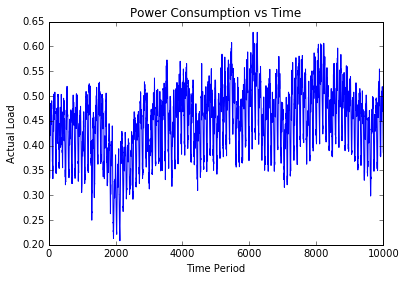

In [42]:
import matplotlib.pyplot as plt
from random import *
%matplotlib inline 
x = range(10000)
y=dat.ix[:,5]
plt.plot(x, y)
plt.xlabel('Time Period')
plt.ylabel('Actual Load')
plt.title('Power Consumption vs Time')
plt.show()


In [43]:
dat["predicted_load"]=theta[0,0]*dat.ix[:,0]+theta[1,0]*dat.ix[:,1]+theta[2,0]*dat.ix[:,2]+theta[3,0]*dat.ix[:,3]+theta[4,0]*dat.ix[:,4]

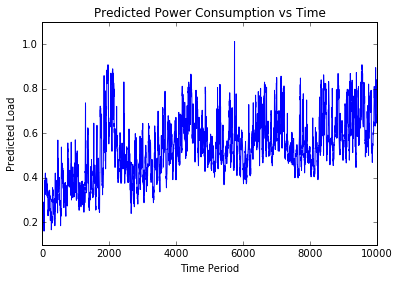

In [44]:
x = range(10000)
y=dat.ix[:,6]
plt.plot(x, y)
plt.xlabel('Time Period')
plt.ylabel('Predicted Load')
plt.title('Predicted Power Consumption vs Time')
plt.show()

In [45]:
J=J/(2.0*10000)

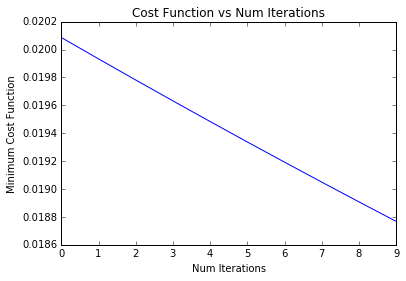

In [46]:
x = range(10)
y=J
plt.plot(x, y)
plt.xlabel('Num Iterations')
plt.ylabel('Minimum Cost Function')
plt.title('Cost Function vs Num Iterations')
plt.show()

In [ ]:
print "learning rate is a bit high"